# The Sparks Foundation - Data Science & Business Analytics Internship

TASK 1 - Prediction using Supervised Machine Learning

Import Dataset

In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings as wg
wg.filterwarnings("ignore")


In [5]:
# Read Dataset From URL

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# shows First 10 data's

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
# To find no.of columns and rows
df.shape

(25, 2)

In [10]:
# Display more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# checking for null value or missing data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Visualization of dataset

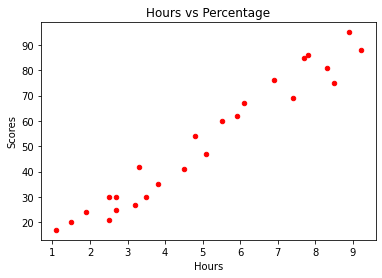

In [21]:
df.plot(kind='scatter',x='Hours',y='Scores', color="red")
plt.title('Hours vs Percentage')
plt.show()

In [17]:
# Correlation b/w two variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Data preparation

In [22]:
df.head()



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [63]:

x =df.iloc[:,:1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [64]:
y =df.iloc[:,1:].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [65]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2, random_state = 0)

Training  Algorithm

In [66]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Visualization of model

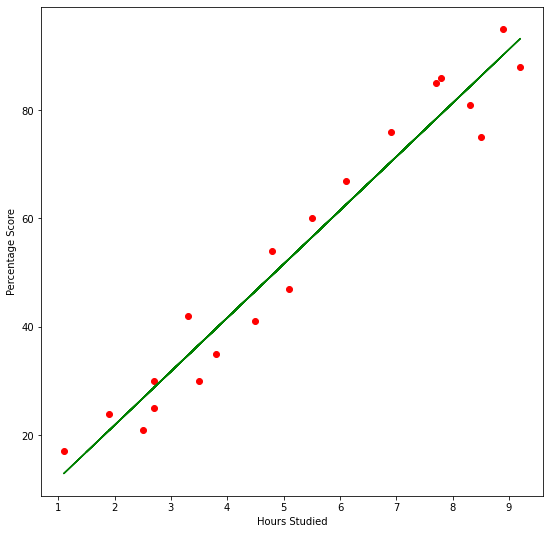

In [67]:
line = model.coef_*x + model.intercept_

#Plot

plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='green')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

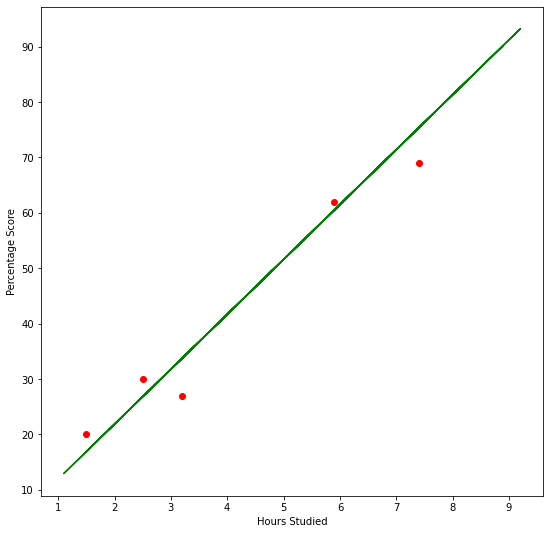

In [68]:
line = model.coef_*x + model.intercept_

#Plot

plt.scatter(x_test,y_test,color='red')
plt.plot(x,line,color='green')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

Make Predictions

In [69]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [70]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [71]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [72]:
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [73]:
hours = 9.25
own_pred =model.predict([[hours]])
print("The predicted score if a person studies",hours,"hours is",own_pred[0])

The predicted score if a person studies 9.25 hours is [93.69173249]


Evaluating the model

In [74]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
